In [1]:
import tensorflow as tf


In [2]:
#Symbolic variables
a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.mul(a, b)

'''
tf.add
tf.sub
tf.mul
tf.div
tf.mod
tf.abs
tf.neg
tf.sign
tf.inv
tf.square
tf.round
tf.sqrt
tf.pow
tf.exp
tf.log
tf.maximum
tf.minimum
tf.cos
tf.sin
'''

'''
On Matrices

tf.diag
tf.transpose
tf.matmul
tf.matrix_determinant
tf.matrix_inverse
'''


'\nOn Matrices\n\ntf.diag\ntf.transpose\ntf.matmul\ntf.matrix_determinant\ntf.matrix_inverse\n'

In [3]:
sess = tf.Session()

# feed_dict to specify input values

print(sess.run(y, feed_dict={a:3, b:4}))

12.0


In [4]:
# Linear Regression
import numpy as np
num_points = 1000
vector_set = []

for i in xrange(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)

    vector_set.append([x1, y1])

In [5]:
x_data = [v[0] for v in vector_set]
y_data = [v[1] for v in vector_set]

print("x_data.shape", len(x_data))
print("v[0]", x_data[0])

('x_data.shape', 1000)
('v[0]', -1.0224188004362555)


In [6]:
import matplotlib.pyplot as plt

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

In [7]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [8]:
# Run
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

In [9]:
for step in xrange(40):
    sess.run(train)
#     print sess.run(loss)
#     print step, sess.run(W), sess.run(b)

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


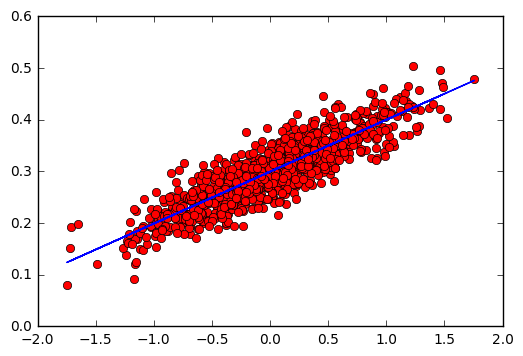

In [10]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.show()

In [11]:
import numpy as np
import h5py

with h5py.File('../fonts.hdf5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('fonts')
    
    smallDataSize = 10000

    As = data[:smallDataSize,0,:,:]
    Bs = data[:smallDataSize,1,:,:]

    As_reshaped = As.reshape((smallDataSize, 64*64))
    Bs_reshaped = Bs.reshape((smallDataSize, 64*64))

    print("As.shape", As.shape)
    print("Bs.shape", Bs.shape)
    
    print("As_reshaped.shape", As_reshaped.shape)
    print("Bs_reshaped.shape", Bs_reshaped.shape)

('List of arrays in this file: \n', [u'fonts'])
('As.shape', (10000, 64, 64))
('Bs.shape', (10000, 64, 64))
('As_reshaped.shape', (10000, 4096))
('Bs_reshaped.shape', (10000, 4096))


In [12]:
training_size = (int)(smallDataSize * 0.90)
test_size = smallDataSize - training_size

print("training_size", training_size)
print("test_size", test_size)
As_reshaped_training = As_reshaped[:training_size, :]
Bs_reshaped_training = Bs_reshaped[:training_size, :]

As_reshaped_test = As_reshaped[training_size:, :]
Bs_reshaped_test = Bs_reshaped[training_size:, :]

print("As_reshaped_training.shape", As_reshaped_training.shape)
print("Bs_reshaped_training.shape", Bs_reshaped_training.shape)
print("As_reshaped_test.shape", As_reshaped_test.shape)
print("Bs_reshaped_test.shape", Bs_reshaped_test.shape)

('training_size', 9000)
('test_size', 1000)
('As_reshaped_training.shape', (9000, 4096))
('Bs_reshaped_training.shape', (9000, 4096))
('As_reshaped_test.shape', (1000, 4096))
('Bs_reshaped_test.shape', (1000, 4096))


In [ ]:
Bs_reshaped_training_firstBit = Bs_reshaped_training[:, 0]
print("Bs_reshaped_training_firstBit.shape", Bs_reshaped_training_firstBit.shape)

Bs_reshaped_test_firstBit = Bs_reshaped_test[:, 0]
print("Bs_reshaped_test_firstBit.shape", Bs_reshaped_test_firstBit.shape)

final_training = As_reshaped_training.astype(float)

final_target = Bs_reshaped_training_firstBit.astype(float)

('Bs_reshaped_training_firstBit.shape', (9000,))
('Bs_reshaped_test_firstBit.shape', (1000,))


In [ ]:
X1 = tf.placeholder(tf.float32, [None, 64 * 64])
W1 = tf.Variable(tf.zeros([4096, 1]))
b1 = tf.Variable(tf.zeros([1]))

y1 = tf.matmul(X1, W1) + b1

loss = tf.reduce_mean(tf.square(y1 - final_target))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.00000005)
train = optimizer.minimize(loss)

# Run
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init, feed_dict={X1:final_training})

for step in xrange(40):
    _, loss_val = sess.run([train, loss], feed_dict={X1:final_training})
print(loss_val)


In [ ]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [ ]:
# Run
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

In [ ]:
for step in xrange(40):
    sess.run(train)
    print sess.run(loss)
    print step, sess.run(W), sess.run(b)